In [31]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
con = sqlite3.connect("DB/test-000007.db")

df = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", con)


In [33]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-11 07:05:03.151,2,explorer.exe,0
1,2022-12-11 07:05:03.151,3,XamlExplorerHostIslandWindow,0
2,2022-12-11 07:05:03.151,4,\DISPLAY1,0
3,2022-12-11 07:07:30.545,13,League of Legends,0
4,2022-12-11 07:07:30.545,2,LeagueClientUx.exe,0
...,...,...,...,...
98,2022-12-11 09:05:19.413,4,\DISPLAY2,0
99,2022-12-11 09:05:25.427,13,esrv.exe,0
100,2022-12-11 09:05:25.427,2,VsDebugConsole.exe,0
101,2022-12-11 09:05:25.427,3,ConsoleWindowClass,0


In [34]:
frames = []
for i in range(1, 30):
    if i < 10:
        filename = "DB/test-00000" + str(i) + ".db"
    else:
        filename = "DB/test-0000" + str(i) + ".db"
    #print(filename)
    cons = sqlite3.connect(filename)
    dfs = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cons)
    frames.append(dfs)

In [35]:
fulldf = pd.concat(frames, ignore_index=True)

In [36]:
fulldf

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-08 06:23:06.681,2,esrv.exe,0
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
2,2022-12-08 06:23:06.681,4,ConsoleWindowClass,0
3,2022-12-08 06:23:06.681,5,\DISPLAY2,0
4,2022-12-08 06:23:12.697,2,League of Legends,0
...,...,...,...,...
5422,2023-01-18 05:43:41.946,4,\DISPLAY1,0
5423,2023-01-18 05:43:44.950,13,esrv.exe,0
5424,2023-01-18 05:43:44.950,2,VsDebugConsole.exe,0
5425,2023-01-18 05:43:44.950,3,ConsoleWindowClass,0


In [46]:
fulldf["MEASUREMENT_TIME"] = pd.to_datetime(fulldf['MEASUREMENT_TIME'])

earliest date

In [48]:
fulldf["MEASUREMENT_TIME"].min()

Timestamp('2022-12-08 06:23:06.681000')

Latest date

In [49]:
fulldf["MEASUREMENT_TIME"].max()

Timestamp('2023-01-18 05:43:44.950000')

In [50]:
fulldf["MEASUREMENT_TIME"].describe()

C:\Users\langr\AppData\Local\Temp/ipykernel_34556/1053303542.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fulldf["MEASUREMENT_TIME"].describe()


count                           5427
unique                          1360
top       2022-12-08 06:23:06.681000
freq                               4
first     2022-12-08 06:23:06.681000
last      2023-01-18 05:43:44.950000
Name: MEASUREMENT_TIME, dtype: object

In [54]:
fulldf["VALUE"].unique()

array(['esrv.exe', 'VsDebugConsole.exe', 'ConsoleWindowClass',
       '\\DISPLAY2', 'League of Legends', 'LeagueClientUx.exe', 'RCLIENT',
       'Activity for Zeming Zhang ( zhangzeming2023@163.com ) - Personal - Microsoft\u200b Edge',
       'msedge.exe', 'Chrome_WidgetWin_1', 'Search', 'SearchHost.exe',
       'Windows.UI.Core.CoreWindow', 'Spotify Premium', 'Spotify.exe',
       'Chrome_WidgetWin_0', 'League of Legends (TM) Client',
       'League of Legends.exe', 'RiotWindowClass', 'WeChat', 'WeChat.exe',
       'WeChatMainWndForPC', 'Beyond - 冷雨夜',
       'mouse_input - Microsoft Visual Studio', 'devenv.exe',
       'HwndWrapper[DefaultDomain;;7255853a-7402-4a93-8d95-e55c01fc3a3a]',
       'Drake - Jimmy Cooks (feat. 21 Savage)', '', 'explorer.exe',
       'NotifyIconOverflowWindow', 'CefWebViewWnd',
       '张泽明2023Fall研究生申请 and 4 more pages - Personal - Microsoft\u200b Edge',
       'Request for letter of recommendation - zezhang@ucsd.edu - UC San Diego Mail and 4 more pages - Pe

In [55]:
apps = fulldf[fulldf['VALUE'].str.contains(".exe")]
apps = apps[apps["VALUE"] != "esrv.exe"]
apps

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
1,2022-12-08 06:23:06.681,3,VsDebugConsole.exe,0
5,2022-12-08 06:23:12.697,3,LeagueClientUx.exe,0
9,2022-12-08 06:23:21.730,3,msedge.exe,0
13,2022-12-08 06:23:27.732,3,LeagueClientUx.exe,0
17,2022-12-08 06:23:45.790,3,SearchHost.exe,0
...,...,...,...,...
5408,2023-01-18 05:39:50.351,2,LockApp.exe,0
5412,2023-01-18 05:39:53.360,2,SearchHost.exe,0
5416,2023-01-18 05:39:56.360,2,msedge.exe,0
5420,2023-01-18 05:43:41.946,2,explorer.exe,0


In [52]:
apps["VALUE"].unique()

array(['VsDebugConsole.exe', 'LeagueClientUx.exe', 'msedge.exe',
       'SearchHost.exe', 'Spotify.exe', 'League of Legends.exe',
       'WeChat.exe', 'devenv.exe', 'explorer.exe',
       'Razer Synapse Service Process.exe', 'LockApp.exe', 'Teams.exe',
       'Zoom.exe', 'OpenWith.exe', 'ShellExperienceHost.exe',
       'DB Browser for SQLite.exe', 'StartMenuExperienceHost.exe',
       'LeagueClient.exe', 'Discord.exe', 'MoNotificationUx.exe',
       'steam.exe', 'Origin.exe', 'NeedForSpeedHeat.exe',
       'steamwebhelper.exe', 'rundll32.exe', 'REDlauncher.exe',
       'Cyberpunk2077.exe', 'RiotClientUx.exe', 'WechatBrowser.exe'],
      dtype=object)

Most frenquent Application: msedge.exe (browser)

In [19]:
value = list(fulldf['VALUE'])
values = [i for i in value if i[-4:] == '.exe']
def most_common(lst):
    return max(set(lst), key=lst.count)
most_common(values)

'msedge.exe'

In [56]:
import collections
counter = collections.Counter(apps['VALUE'])
ranking = sorted(counter.items(), key=lambda x:x[1], reverse=True)
ranking[0]

('msedge.exe', 341)

In [57]:
app = [x[0] for x in ranking][:10]
count = [x[1] for x in ranking][:10]
count

[341, 274, 268, 86, 64, 46, 38, 19, 17, 16]

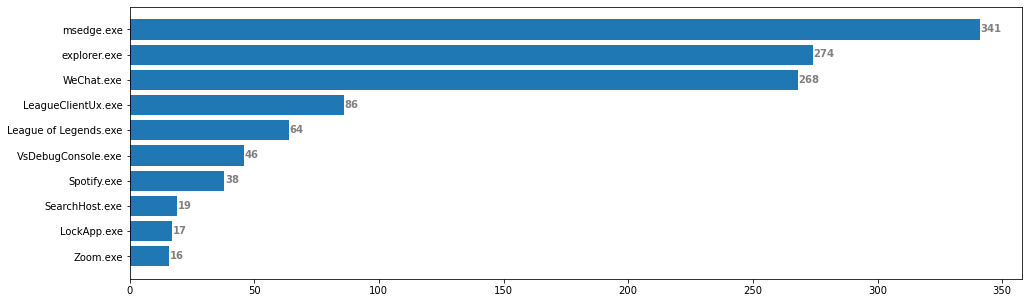

In [58]:
fig, ax = plt.subplots(figsize =(16, 5))
ax.barh(app, count)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

HMM

In [24]:
#pip install --upgrade --user hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
#from hmmlearn import hmm


In [59]:
count_all = [x[1] for x in ranking]
startprob = np.array(count_all)/sum(count_all)
startprob

array([0.27522195, 0.22114609, 0.21630347, 0.06941082, 0.05165456,
       0.03712672, 0.0306699 , 0.01533495, 0.01372074, 0.01291364,
       0.00887813, 0.00807103, 0.00726392, 0.00564972, 0.00403551,
       0.00322841, 0.00242131, 0.00242131, 0.00161421, 0.00161421,
       0.00161421, 0.00161421, 0.00161421, 0.00161421, 0.00161421,
       0.0008071 , 0.0008071 , 0.0008071 , 0.0008071 ])

In [77]:
app_name = [x[0] for x in ranking]
app_encode = []
for i in range(len(apps)):
    curr = list(apps["VALUE"])[i]
    app_encode.append(app_name.index(curr))
#app_encode

In [68]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [69]:
transition_matrix(app_encode)

[[0.09970674486803519,
  0.2991202346041056,
  0.4281524926686217,
  0.017595307917888565,
  0.017595307917888565,
  0.03225806451612903,
  0.011730205278592375,
  0.020527859237536656,
  0.017595307917888565,
  0.02932551319648094,
  0.0,
  0.0,
  0.0,
  0.017595307917888565,
  0.002932551319648094,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.002932551319648094,
  0.002932551319648094,
  0.0,
  0.0],
 [0.2956204379562044,
  0.07664233576642336,
  0.24817518248175183,
  0.11313868613138686,
  0.10948905109489052,
  0.032846715328467155,
  0.010948905109489052,
  0.010948905109489052,
  0.021897810218978103,
  0.0072992700729927005,
  0.0072992700729927005,
  0.0036496350364963502,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.010948905109489052,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.0036496350364963502,
  0.0,
  0.0,
  0.0036496350364963502,
  0.0072992700729927005,
  0.0,
  0.0,
  0.0,
  0.0036